# Data Preprocessing and QC

### First install and import packages

In [ ]:
%pip install polars
%pip install matplotlib
%pip install seaborn
%pip install pyarrow

### Restart Kernel then import packages

In [46]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyarrow as pa
import pandas as pd

## 1. Loading Pillar Project Data

In [4]:
# pillar_condensed_df = pl.read_csv("../1_inputs/raw_inputs/pillar_data/pillar_data_condensed_053125_wREVEL.csv", schema_overrides={"Chrom": pl.String, 'aa_pos': pl.String, 'auth_reported_score': pl.String})
# pillar_condensed_df

pillar_clinvar_df = pl.read_csv(
    "../1_inputs/raw_inputs/pillar_data/pillar_data_clinvar38_053125_wREVEL.csv", 
    schema_overrides={"Chrom": pl.String, 'aa_pos': pl.String, 'auth_reported_score': pl.String}
).with_columns(
    pl.concat_str(
        [
            pl.col("Gene"),
            # remove leading "p." from hgvs_p
            pl.col("hgvs_p").str.replace(r"^p\.", "")  
        ],
        separator="_"
    ).alias("gene_variant")
)

print("Original pillar dataset shape:", pillar_clinvar_df.shape)

## filter the SNP variants only
pillar_clinvar_single_aa_df = pillar_clinvar_df.filter(
    (pl.col("consequence").str.contains("sense")) & \
    (pl.col("ref_allele").str.len_chars()==1) & (pl.col("alt_allele").str.len_chars()==1) & \
    (pl.col("hg38_start").is_not_null()) & (pl.col("hg38_end").is_not_null())
).drop_nulls(subset="hgvs_p").with_columns(
    pl.col("hg38_start").cast(pl.Int32).cast(pl.String).alias("nuc_loc"),
    pl.col("hgvs_p").str.split(".").list.get(-1).alias("aa_change")
).with_columns(
    
)

print("Filtered missense/SNP pillar dataset shape:", pillar_clinvar_single_aa_df.shape)

pillar_clinvar_single_aa_df = pillar_clinvar_single_aa_df.with_columns(
    
).with_columns(
    
).sort("gene_variant", "gnomad_MAF", descending=[False,False])

print("Number of unique gene variants:", pillar_clinvar_single_aa_df.unique(subset="gene_variant").shape[0])
print("Number of unique genes:", pillar_clinvar_single_aa_df.unique(subset="Gene").shape[0])

display(pillar_clinvar_single_aa_df) #.filter(pl.col("Ref_seq_transcript_ID").str.contains("NC_"))

Original pillar dataset shape: (1053944, 60)
Filtered missense/SNP pillar dataset shape: (121503, 62)
Number of unique gene variants: 61155
Number of unique genes: 33


ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,alt_allele,auth_transcript_id,transcript_pos,transcript_ref,transcript_alt,aa_pos,aa_ref,aa_alt,hgvs_c,hgvs_p,consequence,auth_reported_score,auth_reported_rep_score,auth_reported_func_class,splice_measure,gnomad_MAF,clinvar_sig,clinvar_star,clinvar_date_last_reviewed,nucleotide_or_aa,MaveDB URN (score set),Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,IGVF_produced,simplified_consequence,Flag,REVEL,Interval 1 name,Interval 1 range,Interval 1 MaveDB class,Interval 2 name,Interval 2 range,Interval 2 MaveDB class,Interval 3 name,Interval 3 range,Interval 3 MaveDB class,Interval 4 name,Interval 4 range,Interval 4 MaveDB class,Interval 5 name,Interval 5 range,Interval 5 MaveDB class,Interval 6 name,Interval 6 range,Interval 6 MaveDB class,gene_variant,nuc_loc,aa_change
str,str,str,f64,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA""",756.0,"""17""",1.0,null,3.483509e6,3.483509e6,"""C""","""A""",null,"""443""",null,null,"""148""","""A""","""D""","""c.443C>A""","""p.Ala148Asp""","""missense_variant""","""-0.1191""",null,null,"""No""",6.1958e-7,null,null,null,"""aa""","""urn:mavedb:00000657-a-2""","""ENST00000263080.3""","""NM_000049.4""","""immortalized human cells""","""Reporter""","""Cell viability""","""protein toxicity""","""No""","""missense_variant""",null,0.714,"""Toxic""","""(0.6, Inf)""","""Abnormal""","""Non-toxic""","""(-Inf, 0.4)""","""Normal""",null,null,null,null,null,null,null,null,null,null,null,null,"""ASPA_Ala148Asp""","""3483509""","""Ala148Asp"""
"""ASPA_Grønbæk-Thygesen_2024_abu…","""ASPA_Grønbæk-Thygesen_2024_abu…","""ASPA""",756.0,"""17""",1.0,null,3.483509e6,3.483509e6,"""C""","""A""",null,"""443""",null,null,"""148""","""A""","""D""","""c.443C>A""","""p.Ala148Asp""","""missense_variant""","""0.9495""",null,null,"""No""",6.1958e-7,null,null,null,"""aa""","""urn:mavedb:00000657-a-1""","""ENST00000263080.3""","""NM_000049.4""","""immortalized human cells""","""Reporter""","""Fluorescence""","""protein stability""","""No""","""missense_variant""",null,0.714,"""low abundance""","""(-Inf, 0.2)""","""Abnormal""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""ASPA_Ala148Asp""","""3483509""","""Ala148Asp"""
"""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA""",756.0,"""17""",1.0,null,3.483509e6,3.483509e6,"""C""","""G""",null,"""443""",null,null,"""148""","""A""","""G""","""c.443C>G""","""p.Ala148Gly""","""missense_variant""","""0.1248""",null,null,"""No""",null,null,null,null,"""aa""","""urn:mavedb:00000657-a-2""","""ENST00000263080.3""","""NM_000049.4""","""immortalized human cells""","""Reporter""","""Cell viability""","""protein toxicity""","""No""","""missense_variant""",null,0.679,"""Toxic""","""(0.6, Inf)""","""Abnormal""","""Non-toxic""","""(-Inf, 0.4)""","""Normal""",null,null,null,null,null,null,null,null,null,null,null,null,"""ASPA_Ala148Gly""","""3483509""","""Ala148Gly"""
"""ASPA_Grønbæk-Thygesen_2024_abu…","""ASPA_Grønbæk-Thygesen_2024_abu…","""ASPA""",756.0,"""17""",1.0,null,3.483509e6,3.483509e6,"""C""","""G""",null,"""443""",null,null,"""148""","""A""","""G""","""c.443C>G""","""p.Ala148Gly""","""missense_variant""","""0.2662""",null,null,"""No""",null,null,null,null,"""aa""","""urn:mavedb:00000657-a-1""","""ENST00000263080.3""","""NM_000049.4""","""immortalized human cells""","""Reporter""","""Fluorescence""","""protein stability""","""No""","""missense_variant""",null,0.679,"""low abundance""","""(-Inf, 0.2)""","""Abnormal""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""ASPA_Ala148Gly""","""3483509""","""Ala148Gly"""

## 1.2 Summary of Pillar Data

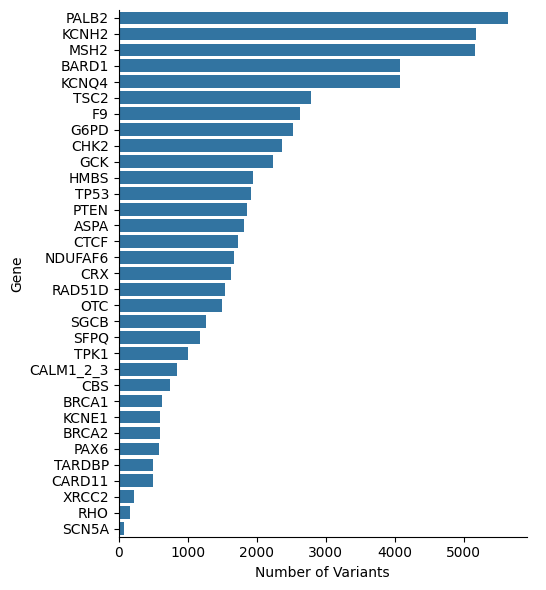

In [5]:
g = sns.catplot(data=pillar_clinvar_single_aa_df.unique(subset="gene_variant").group_by("Gene").len().sort(by="len", descending=True).rename({"len":"Number of Variants"}).to_pandas(), 
            x="Number of Variants", y="Gene", kind="bar", height=6, aspect=.9)
# g.set_titles("Number of variants per gene Pillar dataset")

In [ ]:
pillar_summary_df = pl.read_csv("../1_inputs/raw_inputs/pillar_data/summary_pp_df_051325_expanded.tsv", separator="\t", schema_overrides={"Chrom": pl.String, 'aa_pos': pl.String, 'auth_reported_score': pl.String})
pillar_summary_df

## 2. Loading VarChAMP consolidated dataset

In [7]:
def map_chr(num):
    if num == 23:
        return "X"
    elif num == 24:
        return "Y"
    elif num == 12920:
        return "MT"
    else:
        return str(num)
        

varchamp_seq_df = pl.read_csv("../1_inputs/VarChampSeqConfirmationResult.tsv", separator="\t")
varchamp_seq_df = varchamp_seq_df.with_columns(
    pl.concat_str([pl.col("symbol"),pl.col("aa_change")], separator="_").alias("gene_variant")
).with_columns(
    pl.col("spdi")
    .str.extract(r"NC_0*([0-9]+)", 1)
    .cast(pl.Int32)
    .alias("chr_num")
).with_columns(
    pl.col("chr_num")
    .map_elements(map_chr, return_dtype=pl.String)
    .alias("Chrom")
).with_columns(
    pl.col("spdi").str.split(":").list.get(1).alias("nuc_loc"),
    pl.col("spdi").str.split(":").list.get(2).alias("ref_allele"),
    pl.col("spdi").str.split(":").list.get(3).alias("alt_allele"),
)

varchamp_seq_df

# varchamp_seq_df["mutation_id_old"].unique()
# varchamp_seq_df.filter((pl.col("nuc_ref").str.len_chars()>1)|(pl.col("nuc_alt").str.len_chars()>1))
# varchamp_seq_df.unique(subset="gene_variant")

symbol,ensembl_gene_id,orf_id_wt,mutation_id_old,ccsb_mutation_id,ccsb_allele_id,spdi,nt_change,aa_change,collection,entry_plate_orig,entry_well_orig,entry_plate_conso,entry_well_conso,entry_seq_pool,db_plate,db_well,n2h_plate,n2h_well,dualip_plate,dualip_well,mislocalization_plate,mislocalization_well,entry_sequenced,entry_sequence_confirmation_class,db_sequenced,db_sequence_confirmation_class,n2h_sequenced,n2h_sequence_confirmation_class,dualip_sequenced,dualip_sequence_confirmation_class,mislocalization_sequenced,mislocalization_sequence_confirmation_class,gene_variant,chr_num,Chrom,nuc_loc,ref_allele,alt_allele
str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str,i64,str,i64,str,i64,str,str,i32,str,str,str,str
"""GBA1""","""ENSG00000177628""",2,6,"""CCSBVarC000001""","""ALE0000584""","""NC_000001.11:155240033:C:G""","""160G>C""","""Val54Leu""","""RC4""","""RC4_Mut_GDEh1026""","""H01""","""GDEhDisVCh_40054""","""F12""","""2""","""RC4_Mut_GDDh1026""","""H01""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""2""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""GBA1_Val54Leu""",1,"""1""","""155240033""","""C""","""G"""
"""GBA1""","""ENSG00000177628""",2,73,"""CCSBVarC000002""","""ALE00000002""","""NC_000001.11:155238225:G:A""","""670C>T""","""Leu224Phe""","""RC4""","""RC4_Mut_GDEh1026""","""E01""","""GDEhDisVCh_40054""","""C12""","""2""","""RC4_Mut_GDDh1026""","""E01""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""1""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""GBA1_Leu224Phe""",1,"""1""","""155238225""","""G""","""A"""
"""GBA1""","""ENSG00000177628""",2,113,"""CCSBVarC000003""","""ALE00000003""","""NC_000001.11:155237453:C:T""","""887G>A""","""Arg296Gln""","""RC4""","""RC4_Mut_GDEh1026""","""F01""","""GDEhDisVCh_40054""","""D12""","""2""","""RC4_Mut_GDDh1026""","""F01""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""7""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""GBA1_Arg296Gln""",1,"""1""","""155237453""","""C""","""T"""
"""GBA1""","""ENSG00000177628""",2,231,"""CCSBVarC000004""","""ALE00000004""","""NC_000001.11:155235252:A:G""","""1448T>C""","""Leu483Pro""","""RC4""","""RC4_Mut_GDEh1026""","""G01""","""GDEhDisVCh_40054""","""E12""","""2""","""RC4_Mut_GDDh1026""","""G01""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""2""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""GBA1_Leu483Pro""",1,"""1""","""155235252""","""A""","""G"""
"""GBA1""","""ENSG00000177628""",2,213510,"""CCSBVarC003869""","""ALE00003869""","""NC_000001.11:155239934:G:A""","""259C>T""","""Arg87Trp""","""CEGS2""","""CegsMutGDEh1035""","""B03""","""GDEhDisVCh_40054""","""B02""","""2""","""CegsMutGDDh1035""","""B03""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""2""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""GBA1_Arg87Trp""",1,"""1""","""155239934""","""G""","""A"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CTNNB1""","""ENSG00000168036""",100070227,212487,"""CCSBVarC007073""","""ALE00007071""","""NC_000003.12:41225785:A:G""","""860A>G""","""Asn287Ser""","""CEGS2""","""CegsMutGDEh1023""","""B07""","""GDEhDisVCh_40034""","""E09""","""2""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",0,"""NULL""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""CTNNB1_Asn287Ser""",3,"""3""","""41225785""","""A""","""G"""
"""TBX19""","""ENSG00000143178""",100070258,212488,"""CCSBVarC007074""","""ALE00007072""","""NC_000001.11:168291339:C:T""","""383C>T""","""Ser128Phe""","""CEGS2""","""CegsMutGDEh1043""","""A07""","""GDEhDisVCh_40046""","""B02""","""2""","""CegsMutGDDh1043""","""A07""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""7""",1,"""7""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""TBX19_Ser128Phe""",1,"""1""","""168291339""","""C""","""T"""
"""TBX19""","

# Load CAVA dataset

In [37]:
cava = pl.read_csv("../1_inputs/B13_B14 Metadata_update_SPDI.csv")
cava = cava.rename(
    {"gene_allele": "gene_variant"}
).with_columns(
    # regex replace a single trailing underscore
    pl.col("gene_variant")
      .str.replace(r"_$", "", literal=False)
      .alias("gene_variant")
)
cols_to_keep = [
    "spdi",
    "symbol",
    "gene_variant",
    "node_type",
    "orf_id_wt",
    "ccsb_mutation_id",
    "nt_change_cdna",
    "aa_change",
    "dest_well",
    "dest_plate",
    "imaging_well",
    "imaging_plate_R1",
    "imaging_plate_R2"
]
cava = cava.select(cols_to_keep)

# filter for node_type == "allele" and spdi null/NA
missing_spdi_cava = cava.filter(
    (pl.col("node_type") == "allele") &
    pl.col("spdi").is_null()
)

# get the count
print("Number of CAVA alleles that are missing spdi is:", missing_spdi_cava.shape[0]) # these appear to come from RC4 mutant collection

Number of CAVA alleles that are missing spdi is: 5


spdi,symbol,gene_variant,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,dest_well,dest_plate,imaging_well,imaging_plate_R1,imaging_plate_R2
str,str,str,str,i64,str,str,str,str,str,str,str,str
null,"""ABCD1""","""ABCD1""","""disease_wt""",100008637,null,null,null,"""A01""","""527_CAVA_Array_P01""","""A01""","""B13A7A8P1_R1""","""B14A7A8P1_R2"""
"""NC_000023.11:153740155:C:T""","""ABCD1""","""ABCD1_Arg518Trp""","""allele""",100008637,"""CCSBVarC007022""","""1552C>T""","""Arg518Trp""","""B01""","""527_CAVA_Array_P01""","""C01""","""B13A7A8P1_R1""","""B14A7A8P1_R2"""
"""NC_000023.11:153736195:C:G""","""ABCD1""","""ABCD1_Arg389Gly""","""allele""",100008637,"""CCSBVarC007023""","""1165C>G""","""Arg389Gly""","""C01""","""527_CAVA_Array_P01""","""E01""","""B13A7A8P1_R1""","""B14A7A8P1_R2"""
"""NC_000023.11:153740156:G:A""","""ABCD1""","""ABCD1_Arg518Gln""","""allele""",100008637,"""CCSBVarC007021""","""1553G>A""","""Arg518Gln""","""D01""","""527_CAVA_Array_P01""","""G01""","""B13A7A8P1_R1""","""B14A7A8P1_R2"""
null,"""BAP1""","""BAP1""","""disease_wt""",3760,null,null,null,"""E01""","""527_CAVA_Array_P01""","""I01""","""B13A7A8P1_R1""","""B14A7A8P1_R2"""
…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,null,null,null,null,"""F06""","""527_CAVA_Array_P08""","""L12""","""B13A7A8P2_R1""","""B14A7A8P2_R2"""
null,"""MAPK9""","""MAPK9""","""NC""",null,null,null,null,"""F07""","""527_CAVA_Array_P08""","""L14""","""B13A7A8P2_R1""","""B14A7A8P2_R2"""
null,"""RHEB""","""RHEB""","""NC""",null,null,null,null,"""E08""","""527_CAVA_Array_P08""","""J16""","""B13A7A8P2_R1""","""B14A7A8P2_R2"""


# Load OnePercent Dataset (batches 7-8, 11-12, 15-16)

In [162]:
# oneper_shift is the latest onepercent (Batches 7 & 8) platemap, including sanger sequencing results to identify plating shifts due to robotic rearray errors plus pooled sequencing results
oneper_shift = pl.read_csv("../1_inputs/2025_06_02_A1_metadata_VarChampSeqConfirmationResult_merge_update.csv")
# # Select only clones that experienced rearray shift
# oneper_shift = oneper_shift.filter(
#     (pl.col("seq_position_off") != 0) &
#     pl.col("seq_position_off").is_not_null()
# )

# oneper_seq contians pooled sequencing results from Tong
oneper_seq = pl.read_csv("../1_inputs/VarChampSeqConfirmation1percent.tsv", separator="\t")
oneper_seq = oneper_seq.rename({
    "seq_confirmation":       "pool_seq_confirmation",
    "seq_confirmation_class": "pool_seq_confirmation_class"
})

# Double check Tanisha merged pooled sequencing results correctly
oneper_shift = oneper_shift.join(
    # grab only the two keys + the two cols you want from oneper
    oneper_seq.select([
        "entry_well",
        "entry_plate",
        "pool_seq_confirmation",
        "pool_seq_confirmation_class",
    ]),
    left_on  = ["source_well",  "source_plate"],
    right_on = ["entry_well",    "entry_plate"],
    how      = "left",
)

mismatch_count = oneper_shift.filter(
    pl.col("seq_confirmation_class") != pl.col("pool_seq_confirmation_class")
).height

if mismatch_count == 0:
    print("Tanisha merged pooled sequencing file with A1 platemap correctly.")
else:
    print(f"Found {mismatch_count} mismatches in the merge.")

# drop duplicate columns
oneper_shift = oneper_shift.drop([
    "seq_confirmation",
    "seq_confirmation_class"
])

# === Due to the rearray error, rows are not currently aligned perfectly. The next chunk fixes this ===
# change nulls to 0
oneper_shift = oneper_shift.with_columns(
    pl.col("seq_position_off")
      .fill_null(0)
      .alias("seq_position_off")
)

# the columns you want to shift/duplicate
cols = [
    "source_plate",
    "source_well",
    "pool_seq_confirmation",
    "pool_seq_confirmation_class",
    "orf_id_wt",
    "node_type",
    "ccsb_mutation_id",
    "nt_change_cdna",
    "aa_change"
]

oneper_shift = (
    oneper_shift
      # 1) add a row-index
    .with_row_index("idx")
      # 2) duplicate your final_* columns & compute the join index
    .with_columns(
        # duplicate
        [pl.col(c).alias(f"final_{c}") for c in cols]
        # compute where to pull from
        + [(pl.col("idx") - pl.col("seq_position_off")).alias("join_idx")]
    )
)

# 3) build a mini‐table of shifted originals
shift_df = oneper_shift.select(
    pl.col("idx"),
    *[pl.col(c).alias(f"{c}_shift") for c in cols]
)

# 4) join, overwrite via fill_null, and drop helpers
oneper_shift = (
    oneper_shift
      .join(shift_df, left_on="join_idx", right_on="idx", how="left")
      .with_columns([
          # if x_shift exists use it, else keep your initial final_x
          pl.col(f"{c}_shift")
            .fill_null(pl.col(f"final_{c}"))
            .alias(f"final_{c}")
          for c in cols
      ])
      .drop(
        ["idx", "join_idx"] 
        + [f"{c}_shift" for c in cols]
      )
)

# done—your final_* columns have been shifted wherever seq_position_off ≠ 0

oneper = oneper_shift.select(
    [
        "final_symbol",
        "final_gene_allele",
        "final_source_plate",
        "final_source_well",
        "imaging_well",
        "imaging_plate_R1",
        "imaging_plate_R2",        
        "final_node_type",
        "final_orf_id_wt",
        "final_ccsb_mutation_id",
        "final_nt_change_cdna",
        "final_aa_change",
        "final_pool_seq_confirmation",
        "final_pool_seq_confirmation_class"
    ]
)

# drop the "final_" prefix from every column that has it
oneper = oneper.rename({
    c: c.removeprefix("final_")
    for c in oneper.columns
    if c.startswith("final_")
})

# === Append spdi to oneper platemap ===
oneper_meta = pl.read_csv(
    "../1_inputs/Chloe_muts_1_percent_VarCahmp.tsv",
    separator="\t",
    infer_schema_length=10000,   # look at more rows when inferring
    schema_overrides={           # override just that one column
        "pct_orf_covered_by_protein": pl.Float64
    }
)

# === Double check all mutants are annotated in the metadata file ===
# 1) Unique IDs in each
meta_ids = oneper_meta.select("mutation_id").unique()
ccsb_ids = oneper.select("ccsb_mutation_id").unique()

total_meta = meta_ids.height
total_ccsb = ccsb_ids.height

# 2) How many meta IDs appear in oneper$ccsb_mutation_id?
meta_in_ccsb = meta_ids.filter(
    pl.col("mutation_id").is_in(ccsb_ids["ccsb_mutation_id"])
).height

# 3) How many oneper$ccsb_mutation_id appear in oneper_meta$mutation_id?
ccsb_in_meta = ccsb_ids.filter(
    pl.col("ccsb_mutation_id").is_in(meta_ids["mutation_id"])
).height

# 4) Print counts and percentages
print(f"\noneper ccsb_mutation_id → oneper_meta mutation_id:")
print(f"  {ccsb_in_meta} / {total_ccsb} = {ccsb_in_meta/total_ccsb:.2%}")

# === Append spdi and other metadata to oneper platemap ===
# 1) list out the columns you want from oneper_meta
meta_cols = [
    "symbol_gencode_v44",
    "chr",
    "chr_pos_37",
    "chr_pos_38",
    "ccsb_allele_id",
    "ccsb_mutation_id",
    "ensembl_gene_id",
    "ensembl_protein_id",
    "pct_identical_protein",
    "pct_protein_covered_by_orf",
    "pct_orf_covered_by_protein",
    "entrez_gene_id",
    "spdi",
]

# 2) build the join
oneper = oneper.join(
    # select only the join key + the meta columns
    oneper_meta.select(["mutation_id", *meta_cols]),
    left_on  = "ccsb_mutation_id",
    right_on = "mutation_id",
    how      = "left",
)

# 4) verify
oneper.head()

# Drop all control wells and empty wells
oneper = oneper.filter(
    # keep rows where node_type does NOT contain "C"
    ~pl.col("node_type").str.contains("C")
    # and gene_allele is not null
    & pl.col("gene_allele").is_not_null()
)

# filter for node_type == "allele" and spdi null/NA
missing_spdi_oneper = oneper.filter(
    (pl.col("node_type") == "allele") &
    pl.col("spdi").is_null()
)

# get the count
print("Number of OnePercent alleles that are missing spdi is:", missing_spdi_oneper.shape[0]) # these appear to be spiked in minipreps

# rename
oneper = oneper.rename({
    "gene_allele": "gene_variant"
})

# === Write final onepercent (B7-8) file ===
oneper.write_csv("../3_outputs/onepercent_B7-8_A1_seq_and_meta.csv")

Tanisha merged pooled sequencing file with A1 platemap correctly.

oneper ccsb_mutation_id → oneper_meta mutation_id:
  977 / 978 = 99.90%
Number of OnePercent alleles that are missing spdi is: 5


C:\Users\chloe\AppData\Local\Temp\ipykernel_27604\892658338.py:149: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  meta_in_ccsb = meta_ids.filter(
C:\Users\chloe\AppData\Local\Temp\ipykernel_27604\892658338.py:154: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  ccsb_in_meta = ccsb_ids.filter(


# Merge CAVA and OnePercent

In [ ]:
combined = pl.concat(
    [oneper, cava],
    how="diagonal_relaxed",
    rechunk=True
)

In [206]:
# create a trimmed spdi for mapping so I don't have to pull RefSeq chromosome ID for pillar project dataframe
oneper = oneper.with_columns(
    pl.col("spdi")
      # match:  ^NC_0+(\d+)   then  \.\d+:   and replace with “\1:”
      .str.replace(r"^NC_0+(\d+)\.\d+:", r"$1:", literal=False)
      .alias("spdi_trimmed")
)
cava = cava.with_columns(
    pl.col("spdi")
      # match:  ^NC_0+(\d+)   then  \.\d+:   and replace with “\1:”
      .str.replace(r"^NC_0+(\d+)\.\d+:", r"$1:", literal=False)
      .alias("spdi_trimmed")
)
pillar_clinvar_single_aa_df = pillar_clinvar_single_aa_df.with_columns(
    pl.concat_str(
        [
            pl.col("Chrom"),
            pl.col("nuc_loc"),
            pl.col("hgvs_c").str.extract(r"([A-Za-z])>", 1),
            # capture the single-letter just after the ">"
            pl.col("hgvs_c").str.extract(r">([A-Za-z])", 1),
        ],
        separator=":"
    ).alias("spdi_trimmed")
)

In [210]:
print(
    len(set(cava["gene_variant"]).intersection(set(pillar_clinvar_single_aa_df["gene_variant"].unique()))),
    "CAVA alleles out of",
    len(cava.filter(pl.col("node_type") == "allele")["gene_variant"].unique()),
    "mapped to the pillar project dataframe according to gene_variant."
)
print(
    len(set(cava["spdi_trimmed"]).intersection(set(pillar_clinvar_single_aa_df["spdi_trimmed"].unique()))),
    "CAVA alleles out of",
    len(cava["spdi_trimmed"].unique()),
    "mapped to the pillar project dataframe according to spdi_trimmed.\n"
)

print(
    len(set(oneper["gene_variant"]).intersection(set(pillar_clinvar_single_aa_df["gene_variant"].unique()))),
    "OnePercent alleles out of",
    len(oneper.filter(pl.col("node_type") == "allele")["gene_variant"].unique()),
    "mapped to the pillar project dataframe according to gene_variant."
)
print(
    len(set(oneper["spdi_trimmed"]).intersection(set(pillar_clinvar_single_aa_df["spdi_trimmed"].unique()))),
    "OnePercent alleles out of",
    len(oneper["spdi_trimmed"].unique()),
    "mapped to the pillar project dataframe according to spdi_trimmed.\n"
)

print(
    len(set(combined["gene_variant"]).intersection(set(pillar_clinvar_single_aa_df["gene_variant"].unique()))),
    "combined alleles out of",
    len(combined.filter(pl.col("node_type") == "allele")["gene_variant"].unique()),
    "mapped to the pillar project dataframe according to gene_variant."
)

print(
    len(set(combined["spdi_trimmed"]).intersection(set(pillar_clinvar_single_aa_df["spdi_trimmed"].unique()))),
    "CAVA alleles out of",
    len(combined["spdi_trimmed"].unique()),
    "mapped to the pillar project dataframe according to spdi_trimmed."
)

124 CAVA alleles out of 604 mapped to the pillar project dataframe according to gene_variant.
38 CAVA alleles out of 600 mapped to the pillar project dataframe according to spdi_trimmed.

9 OnePercent alleles out of 974 mapped to the pillar project dataframe according to gene_variant.
1 OnePercent alleles out of 974 mapped to the pillar project dataframe according to spdi_trimmed.

132 combined alleles out of 1575 mapped to the pillar project dataframe according to gene_variant.
39 CAVA alleles out of 1570 mapped to the pillar project dataframe according to spdi_trimmed.


In [8]:
# varchamp_consolid_seq_df = pl.read_csv("../1_inputs/VarChamp_Consolidated_allele_collection.tsv", separator="\t", infer_schema_length=10000)
# varchamp_consolid_seq_df

varchamp_consolid_seq_df = pl.read_csv("../1_inputs/varchamp_consolidated_alleles_clinvar_gnomad_dbnsfp_scores.tsv", separator="\t", infer_schema_length=10000)
varchamp_consolid_seq_df_sc = varchamp_consolid_seq_df.join(
    varchamp_seq_df,
    on="spdi",
    how="left"
)

gene_variants_vc = varchamp_consolid_seq_df_sc["gene_variant"].unique()
# varchamp_consolid_seq_df_sc.write_csv("../3_outputs/varchamp_alleles_clinvar_gnomad_dbnsfp_sc.tsv", separator="\t")

In [22]:
varchamp_seq_df
len(set(varchamp_seq_df["gene_variant"]).intersection(set(varchamp_consolid_seq_df_sc["gene_variant"].unique())))

8466

In [ ]:
gene_variants_vc

In [178]:
len(set(gene_variants_vc).intersection(set(pillar_clinvar_single_aa_df["gene_variant"].unique())))

189

## 3. Attempt to merge two datasets

### 3.1 Merge by gene_variant

In [11]:
pillar_varchamp_by_var_df = pillar_clinvar_single_aa_df.join(
    varchamp_seq_df,
    on="gene_variant" #["Chrom", "nuc_loc", "ref_allele", "alt_allele"]
)
display(pillar_varchamp_by_var_df.unique(subset="gene_variant"))

# pillar_varchamp_by_var_df.write_csv("../3_outputs/pillar_varchamp_overlapped_variants.tsv", separator="\t") #.unique(subset="spdi")

ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,alt_allele,auth_transcript_id,transcript_pos,transcript_ref,transcript_alt,aa_pos,aa_ref,aa_alt,hgvs_c,hgvs_p,consequence,auth_reported_score,auth_reported_rep_score,auth_reported_func_class,splice_measure,gnomad_MAF,clinvar_sig,clinvar_star,clinvar_date_last_reviewed,nucleotide_or_aa,MaveDB URN (score set),Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,…,ensembl_gene_id,orf_id_wt,mutation_id_old,ccsb_mutation_id,ccsb_allele_id,spdi,nt_change,aa_change_right,collection,entry_plate_orig,entry_well_orig,entry_plate_conso,entry_well_conso,entry_seq_pool,db_plate,db_well,n2h_plate,n2h_well,dualip_plate,dualip_well,mislocalization_plate,mislocalization_well,entry_sequenced,entry_sequence_confirmation_class,db_sequenced,db_sequence_confirmation_class,n2h_sequenced,n2h_sequence_confirmation_class,dualip_sequenced,dualip_sequence_confirmation_class,mislocalization_sequenced,mislocalization_sequence_confirmation_class,chr_num,Chrom_right,nuc_loc_right,ref_allele_right,alt_allele_right
str,str,str,f64,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,…,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str,i64,str,i64,str,i64,str,i32,str,str,str,str
"""ASPA_Grønbæk-Thygesen_2024_abu…","""ASPA_Grønbæk-Thygesen_2024_abu…","""ASPA""",756.0,"""17""",1.0,null,3.47623e6,3.47623e6,"""A""","""G""",null,"""71""",null,null,"""24""","""E""","""G""","""c.71A>G""","""p.Glu24Gly""","""missense_variant""","""-0.0016""",null,null,"""No""",6.1951e-7,"""Likely pathogenic""","""criteria provided, single subm…","""Dec 13, 2023""","""aa""","""urn:mavedb:00000657-a-1""","""ENST00000263080.3""","""NM_000049.4""","""immortalized human cells""","""Reporter""","""Fluorescence""","""protein stability""",…,"""ENSG00000108381""",8459,15684,"""CCSBVarC001383""","""ALE00001383""","""NC_000017.11:3476230:A:G""","""71A>G""","""Glu24Gly""","""RC4""","""RC4_Mut_GDEh1016""","""D01""","""GDEhDisVCh_40040""","""C04""","""2""","""RC4_Mut_GDDh1016""","""D01""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""7""",1,"""1""",0,"""NULL""",0,"""NULL""",0,"""NULL""",17,"""17""","""3476230""","""A""","""G"""
"""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA""",756.0,"""17""",1.0,null,3.499e6,3.499e6,"""A""","""C""",null,"""854""",null,null,"""285.0""","""E""","""A""","""c.854A>C""","""p.Glu285Ala""","""missense_variant""","""0.002""",null,null,"""No""",0.000221,"""Pathogenic""","""criteria provided, multiple su…","""Mar 30, 2024""","""aa""","""urn:mavedb:00000657-a-2""","""ENST00000263080.3""","""NM_000049.4""","""immortalized human cells""","""Reporter""","""Cell viability""","""protein toxicity""",…,"""ENSG00000108381""",8459,15721,"""CCSBVarC001386""","""ALE00001386""","""NC_000017.11:3499000:A:C""","""854A>C""","""Glu285Ala""","""RC4""","""RC4_Mut_GDEh1016""","""G01""","""GDEhDisVCh_40040""","""F04""","""2""","""RC4_Mut_GDDh1016""","""G01""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""1""",0,"""NULL""",0,"""NULL""",0,"""NULL""",17,"""17""","""3499000""","""A""","""C"""
"""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA_Grønbæk-Thygesen_2024_tox…","""ASPA""",756.0,"""17""",1.0,null,3.481793e6,3.481793e6,"""A""","""T""",null,"""427""",null,null,"""143""","""I""","""F""","""c.427A>T""","""p.Ile143Phe""","""missense_variant""","""0.9625""",null,null,"""No""",6.2656e-7,"""Pathogenic/Likely pathogenic""","""criteria provided, multiple su…","""Mar 14, 2024""","""aa""","""urn:mavedb:00000657-a-2""","""ENST00000263080.3""","""NM_000049.4""","""immortalized human cells""","""Reporter""","""Cell viability""","""protein toxicity""",…,"""ENSG00000108381""",8459,15694,"""CCSBVarC001384""","""ALE00001384""","""NC_000017.11:3481793:A:T""","""427A>T""",""

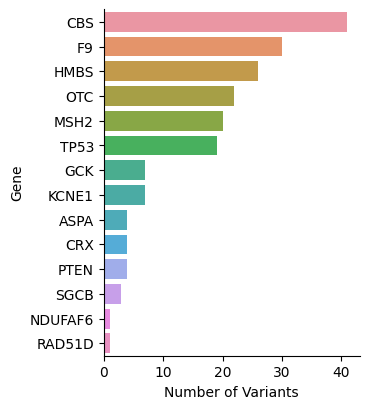

In [58]:
g = sns.catplot(data=pillar_varchamp_by_var_df.unique(subset="gene_variant").group_by("Gene").len().sort(by="len", descending=True).rename({"len":"Number of Variants"}).to_pandas(), 
                x="Number of Variants", y="Gene", kind="bar", height=4, aspect=.9)

In [60]:
# varchamp_seq_df.filter(pl.col("symbol")=="RHO")

### 3.2 Merge by genomic locations

In [55]:
pillar_varchamp_by_gen_loc_df = pillar_clinvar_single_aa_df.join(
    varchamp_seq_df,
    on=["Chrom", "nuc_loc", "ref_allele", "alt_allele"],
    suffix="_vc"
)
display(pillar_varchamp_by_gen_loc_df.unique(subset="gene_variant"))
pillar_varchamp_by_gen_loc_df.filter(pl.col("gene_variant")==pl.col("gene_variant_vc")).unique(subset="gene_variant")

ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,alt_allele,auth_transcript_id,transcript_pos,transcript_ref,transcript_alt,aa_pos,aa_ref,aa_alt,hgvs_c,hgvs_p,consequence,auth_reported_score,auth_reported_rep_score,auth_reported_func_class,splice_measure,gnomad_MAF,clinvar_sig,clinvar_star,clinvar_date_last_reviewed,nucleotide_or_aa,MaveDB URN (score set),Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,…,aa_change,gene_variant,symbol,ensembl_gene_id,orf_id_wt,mutation_id_old,ccsb_mutation_id,ccsb_allele_id,spdi,nt_change,aa_change_vc,collection,entry_plate_orig,entry_well_orig,entry_plate_conso,entry_well_conso,entry_seq_pool,db_plate,db_well,n2h_plate,n2h_well,dualip_plate,dualip_well,mislocalization_plate,mislocalization_well,entry_sequenced,entry_sequence_confirmation_class,db_sequenced,db_sequence_confirmation_class,n2h_sequenced,n2h_sequence_confirmation_class,dualip_sequenced,dualip_sequence_confirmation_class,mislocalization_sequenced,mislocalization_sequence_confirmation_class,gene_variant_vc,chr_num
str,str,str,f64,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str,i64,str,i64,str,i64,str,str,i32
"""HMBS_van_Loggerenberg_2023_ery…","""HMBS_van_Loggerenberg_2023_ery…","""HMBS""",4982.0,"""11""",1.0,null,1.19090213e8,1.19090213e8,"""G""","""A""",null,"""446""",null,null,"""149""","""R""","""Q""","""c.446G>A""","""p.Arg149Gln""","""missense_variant""","""0.0016450579999999""",null,null,"""No""",null,"""Pathogenic""","""no assertion criteria provided""","""Oct 08, 1999""","""aa""","""urn:mavedb:00000108-a-2""","""ENST00000652429.1""","""NM_000190.4""","""yeast""","""Cell viability""",null,null,…,"""Arg149Gln""","""HMBS_Arg149Gln""","""HMBS""","""ENSG00000256269""",2803,200930,"""CCSBVarC005163""","""ALE00005163""","""NC_000011.10:119090213:G:A""","""446G>A""","""Arg149Gln""","""CEGS2""","""CegsMutGDEh1037""","""B04""","""GDEhDisVCh_40054""","""E03""","""2""","""CegsMutGDDh1037""","""B04""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""2""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""HMBS_Arg149Gln""",11
"""SGCB_Li_2023_var426045""","""SGCB_Li_2023""","""SGCB""",10806.0,"""4""",-1.0,null,5.2029808e7,5.2029808e7,"""A""","""T""",null,"""299""",null,null,"""100""","""M""","""K""","""c.299T>A""","""p.Met100Lys""","""missense_variant""","""-2.02""",null,"""Non-Functional""","""No""",6.1962e-7,"""Conflicting classifications of…","""criteria provided, conflicting…","""Aug 28, 2023""","""aa""","""urn:mavedb:00000659-a-1""","""ENST00000381431.10""","""NM_000232.5""","""immortalized human cells""","""Reporter""","""Fluorescence""","""surface expression""",…,"""Met100Lys""","""SGCB_Met100Lys""","""SGCB""","""ENSG00000163069""",100010885,225816,"""CCSBVarC006987""","""ALE00006985""","""NC_000004.12:52029808:A:T""","""299T>A""","""Met100Lys""","""CEGS2""","""CegsMutGDEh1043""","""E06""","""GDEhDisVCh_40045""","""D01""","""1""","""CegsMutGDDh1043""","""E06""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",1,"""1""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""SGCB_Met100Lys""",4
"""OTC_Lo_2023_var105027""","""OTC_Lo_2023""","""OTC""",8512.0,"""X""",1.0,null,3.8411941e7,3.8411941e7,"""T""","""C""","""NM_000531.6""","""947""",null,null,"""316.0""","""F""","""S""","""c.947T>C""","""p.Phe316Ser""","""missense_variant""","""0.0035930190368981""",null,"""Amorphic""","""No""",null,"""Pathogenic""","""no assertion criteria provided""","""-""","""aa""","""urn:mavedb:00000112-a-1""","""ENST00000039007.5""","""NM_000531.6""","""yeast""","""Cell Viability""","""Cell Survival""","""Overall function""",…,"""Phe316Ser""","""OTC_Phe316Ser""","""OTC""","""ENSG00000036473""",71569,35642,"""CCSBVarC002762""","""ALE000027

ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,alt_allele,auth_transcript_id,transcript_pos,transcript_ref,transcript_alt,aa_pos,aa_ref,aa_alt,hgvs_c,hgvs_p,consequence,auth_reported_score,auth_reported_rep_score,auth_reported_func_class,splice_measure,gnomad_MAF,clinvar_sig,clinvar_star,clinvar_date_last_reviewed,nucleotide_or_aa,MaveDB URN (score set),Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,…,aa_change,gene_variant,symbol,ensembl_gene_id,orf_id_wt,mutation_id_old,ccsb_mutation_id,ccsb_allele_id,spdi,nt_change,aa_change_vc,collection,entry_plate_orig,entry_well_orig,entry_plate_conso,entry_well_conso,entry_seq_pool,db_plate,db_well,n2h_plate,n2h_well,dualip_plate,dualip_well,mislocalization_plate,mislocalization_well,entry_sequenced,entry_sequence_confirmation_class,db_sequenced,db_sequence_confirmation_class,n2h_sequenced,n2h_sequence_confirmation_class,dualip_sequenced,dualip_sequence_confirmation_class,mislocalization_sequenced,mislocalization_sequence_confirmation_class,gene_variant_vc,chr_num
str,str,str,f64,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str,i64,str,i64,str,i64,str,str,i32
"""F9_Popp_2025_light_chain_var24…","""F9_Popp_2025_light_chain""","""F9""",3551.0,"""X""",1.0,null,1.39541127e8,1.39541127e8,"""A""","""G""",null,"""329""",null,null,"""110""","""D""","""G""","""c.329A>G""","""p.Asp110Gly""","""missense_variant""","""1.0519859626998802""",null,null,"""No""",null,"""Pathogenic""","""no assertion criteria provided""","""Apr 01, 1989""","""aa""","""urn:mavedb:00001200-c-1""","""ENST00000218099.7""","""NM_000133.4""","""immortalized human cells""","""Reporter""",null,null,…,"""Asp110Gly""","""F9_Asp110Gly""","""F9""","""ENSG00000101981""",52861,204356,"""CCSBVarC004377""","""ALE00004377""","""NC_000023.11:139541127:A:G""","""329A>G""","""Asp110Gly""","""CEGS2""","""CegsMutGDEh1027""","""D10""","""GDEhDisVCh_40052""","""B07""","""2""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",0,"""NULL""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""F9_Asp110Gly""",23
"""TP53_Fortuno_2021_Kato_meta_va…","""TP53_Fortuno_2021_Kato_meta""","""TP53""",11998.0,"""17""",-1.0,null,7.670678e6,7.670678e6,"""A""","""G""","""NM_000546.5""","""1031""",null,null,"""344""","""L""","""P""","""c.1031T>C""","""p.Leu344Pro""","""missense_variant""","""9.25""",null,null,"""No""",6.1955e-7,"""Likely pathogenic""","""reviewed by expert panel""","""Aug 05, 2024""","""aa""",null,"""ENST00000269305.9""","""NM_000546.5""",null,null,null,null,…,"""Leu344Pro""","""TP53_Leu344Pro""","""TP53""","""ENSG00000141510""",3774,214911,"""CCSBVarC004879""","""ALE00004879""","""NC_000017.11:7670678:A:G""","""1031T>C""","""Leu344Pro""","""CEGS2""","""CegsMutGDEh1021""","""C10""","""GDEhDisVCh_40053""","""G07""","""1""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""","""NULL""",1,"""1""",0,"""NULL""",0,"""NULL""",0,"""NULL""",0,"""NULL""","""TP53_Leu344Pro""",17
"""SGCB_Li_2023_var426045""","""SGCB_Li_2023""","""SGCB""",10806.0,"""4""",-1.0,null,5.2029808e7,5.2029808e7,"""A""","""T""",null,"""299""",null,null,"""100""","""M""","""K""","""c.299T>A""","""p.Met100Lys""","""missense_variant""","""-2.02""",null,"""Non-Functional""","""No""",6.1962e-7,"""Conflicting classifications of…","""criteria provided, conflicting…","""Aug 28, 2023""","""aa""","""urn:mavedb:00000659-a-1""","""ENST00000381431.10""","""NM_000232.5""","""immortalized human cells""","""Reporter""","""Fluorescence""","""surface expression""",…,"""Met100Lys""","""SGCB_Met100Lys""","""SGCB""","""ENSG00000163069""",100010885,225816,"""CCSBVarC006987""","""ALE00006985""","""NC_000004.12:52029808:A:T""","""299T>A""","""Met100Lys""","""CEG

In [63]:
# varchamp_consolid_seq_df_sc.filter(
#     pl.col("symbol").is_in(pillar_clinvar_single_aa_df["Gene"].unique())
# ).write_csv("../3_outputs/varchamp_pillar_genes.tsv", separator="\t") #.unique(subset="spdi")